In [255]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

%matplotlib inline

In [220]:
summary_results_path = 'Data/Summary_Data.csv'
summary_results_df = pd.read_csv(summary_results_path)

In [221]:
#summary_results_df['Date1'] = pd.to_datetime(summary_results_df['Date']).dt.strftime('%Y%m%d')
summary_results_df.rename(columns={'Unnamed: 0': 'Date'}, inplace = True)
summary_results_df

,Date,Pedestrians_Count,Lockdown_Stage,Vehicle_Count,Covid_Cases
0,1/01/2010,190044,Stage 0,NaN,0
1,1/01/2011,210730,Stage 0,NaN,0
2,1/01/2012,217581,Stage 0,NaN,0
3,1/01/2013,212486,Stage 0,NaN,0
4,1/01/2014,378793,Stage 0,NaN,0
...,...,...,...,...,...
4410,31/12/2016,626809,Stage 0,NaN,0
4411,31/12/2017,799773,Stage 0,NaN,0
4412,31/12/2018,742581,Stage 0,NaN,0
4413,31/12/2019,950487,Stage 0,20052.0,0


In [223]:
summary_results_df = summary_results_df[(pd.to_datetime(summary_results_df['Date']).dt.strftime('%Y%m%d')) >= '20190601']
summary_results_df['YYMM'] = pd.to_datetime(summary_results_df['Date']).dt.strftime('%y-%m')
summary_results_df['Ped_Count_0000'] = summary_results_df['Pedestrians_Count']/10000
summary_results_df['Vehicle_Count_000'] = summary_results_df['Vehicle_Count']/1000

In [218]:
summary_results_df

,Date,Pedestrians_Count,Lockdown_Stage,Vehicle_Count,Covid_Cases,YYMM,Ped_Count_000,Vehicle_Count_000,Ped_Count_0000
10,1/01/2020,710047,Stage 0,13996.0,0,20-01,71.0047,13.996,71.0047
11,1/01/2021,396955,Stage 0,NaN,10,21-01,39.6955,NaN,39.6955
22,1/02/2020,761505,Stage 0,19155.0,0,20-01,76.1505,19.155,76.1505
23,1/02/2021,349099,Stage 0,NaN,0,21-01,34.9099,NaN,34.9099
34,1/03/2020,706476,Stage 0,16766.0,2,20-01,70.6476,16.766,70.6476
...,...,...,...,...,...,...,...,...,...
4390,31/08/2020,102497,Stage 4,NaN,57,20-08,10.2497,NaN,10.2497
4401,31/10/2019,791985,Stage 0,23824.0,0,19-10,79.1985,23.824,79.1985
4402,31/10/2020,370181,Stage 2,NaN,0,20-10,37.0181,NaN,37.0181
4413,31/12/2019,950487,Stage 0,20052.0,0,19-12,95.0487,20.052,95.0487


In [224]:
summary_gr_df = summary_results_df.groupby(['YYMM'])
summary_gr_df.sum()

,Pedestrians_Count,Vehicle_Count,Covid_Cases,Ped_Count_0000,Vehicle_Count_000
YYMM,,,,,
19-06,20194222,603975.0,0,2019.4222,603.975
19-07,22744685,631140.0,0,2274.4685,631.140
19-08,23896524,649751.0,0,2389.6524,649.751
19-09,21107792,629895.0,0,2110.7792,629.895
19-10,24738547,643999.0,0,2473.8547,643.999
19-11,23487511,646543.0,0,2348.7511,646.543
19-12,24931172,638409.0,0,2493.1172,638.409
20-01,23189121,471062.0,796,2318.9121,471.062
20-02,21853368,449734.0,557,2185.3368,449.734


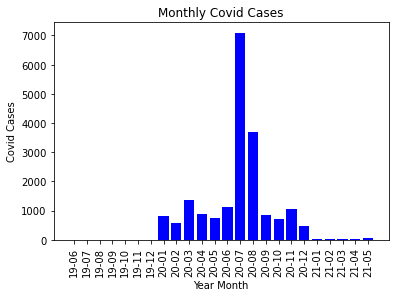

In [274]:
# Bar chart using pandas - Monthly Covid Cases
# get y axix values
timepoint_count = summary_gr_df['Covid_Cases'].sum()

#get x axis number of points
x_axis = np.arange(len(summary_gr_df))

# get a list of months for x axis labels
temp_df = summary_gr_df.count()
month_list = list(temp_df.index.values.tolist())

# plot the bar graph in light blue
plt.bar(x_axis, timepoint_count, color = 'blue', align = 'center')

# create the ticks for bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, month_list, rotation = 'vertical')

# name the chart a title, x label, and y label
plt.title('Monthly Covid Cases')
plt.xlabel('Year Month')
plt.ylabel('Covid Cases')

# Save an image of the chart and print it to the screen
plt.savefig('Images/Covid_Cases_by_Month_bar.png')
plt.show()

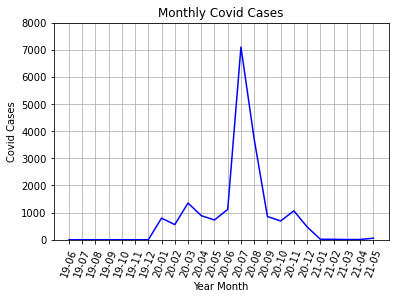

In [267]:
# Line  chart using pyplot - Monthly Covid Cases

# get y axix values
covid_case_count = summary_gr_df['Covid_Cases'].sum()

#get x axis number of points
x_axis = np.arange(len(summary_gr_df))

# get a list of months for x axis labels
temp_df = summary_gr_df.count()
month_list = list(temp_df.index.values.tolist())

# plot a line graph in green
covid_nos, = plt.plot(x_axis, covid_case_count, color ='blue', label='Covid Cases')

# Set the limits for the X and Y axes
#plt.xlim(0,28)
plt.ylim(-10,8000)

# create the ticks for bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, month_list, rotation = '70')

# name the chart a title, x label, and y label
plt.title('Monthly Covid Cases')
plt.xlabel('Year Month')
plt.ylabel('Covid Cases')

# add in a grid for the chart
plt.grid()

# save an image of the chart and print it to the screen
plt.savefig('Images/Covid_Cases_by_Month_line.png')
plt.show()

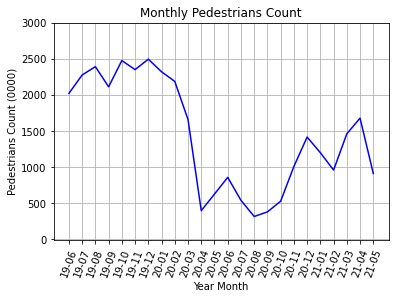

In [268]:
# Line  chart using pyplot - Monthly Pedestrians Count

# get y axix values
timepoint_count = summary_gr_df['Ped_Count_0000'].sum()

# plot a line graph in green
timepoints, = plt.plot(x_axis, timepoint_count, color ='blue')

# Set the limits for the X and Y axes
#plt.xlim(0,28)
plt.ylim(-10,3000)

# create the ticks for bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, month_list, rotation = '70')

# name the chart a title, x label, and y label
plt.title('Monthly Pedestrians Count')
plt.xlabel('Year Month')
plt.ylabel('Pedestrians Count (0000)')

# add in a grid for the chart
plt.grid()

# save an image of the chart and print it to the screen
plt.savefig('Images/Pedestrians_Count_by_Month_line.png')
plt.show()

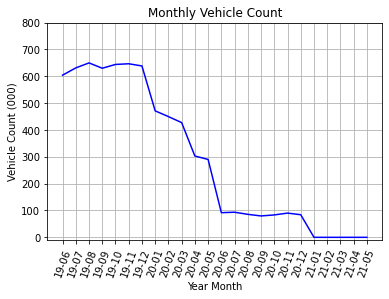

In [269]:
# Line  chart using pyplot - Vehicle count

# get y axix values
timepoint_count = summary_gr_df['Vehicle_Count_000'].sum()

# plot a line graph in green
timepoints, = plt.plot(x_axis, timepoint_count, color ='blue')

# Set the limits for the X and Y axes
#plt.xlim(0,28)
plt.ylim(-10,800)

# create the ticks for bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, month_list, rotation = '70')

# name the chart a title, x label, and y label
plt.title('Monthly Vehicle Count')
plt.xlabel('Year Month')
plt.ylabel('Vehicle Count (000)')

# add in a grid for the chart
plt.grid()

# save an image of the chart and print it to the screen
plt.savefig('Images/Vehicle_count_by_Month_line.png')
plt.show()

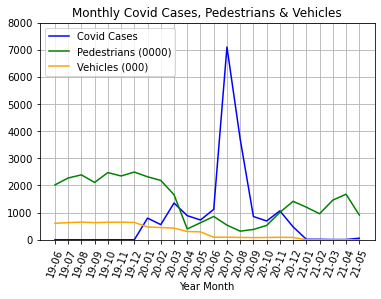

In [277]:
# Line  chart using pyplot - Monthly Covid Cases, Pedestrians & Vehicles in Mel CBD

# get y axix values
covid_case_count = summary_gr_df['Covid_Cases'].sum()
ped_count =  summary_gr_df['Ped_Count_0000'].sum()
vehicle_count = summary_gr_df['Vehicle_Count_000'].sum()

#get x axis number of points
x_axis = np.arange(len(summary_gr_df))

# get a list of months for x axis labels
temp_df = summary_gr_df.count()
month_list = list(temp_df.index.values.tolist())

# plot a line graph in green
covid_nos, = plt.plot(x_axis, covid_case_count, color ='blue', label='Covid Cases')
ped_nos, = plt.plot(x_axis, ped_count, color ='green', label='Pedestrians (0000)')
vehicle_nos, = plt.plot(x_axis, vehicle_count, color ='orange', label='Vehicles (000)')

# Set the limits for the X and Y axes
#plt.xlim(0,28)
plt.ylim(-10,8000)

# create the ticks for bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, month_list, rotation = '70')

# name the chart a title, x label, and y label
plt.title('Monthly Covid Cases, Pedestrians & Vehicles')
plt.xlabel('Year Month')
#plt.ylabel('Covid Cases')

# add in a grid for the chart
plt.grid()

# Create a legend for the chart
plt.legend(handles=[covid_nos, ped_nos, vehicle_nos], loc='upper left')

# save an image of the chart and print it to the screen
plt.savefig('Images/Monthly_Covid_Cases_Pedestrians_Vehicles_line.png')
plt.show()

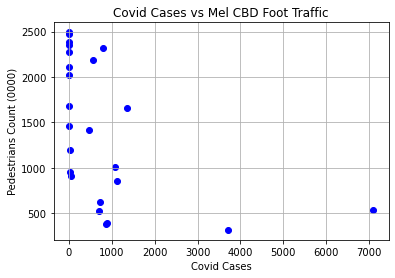

In [271]:
# Generate a scatter plot - Covid Cases vs Mel CBD Foot Traffic
Covid_Cases_x  = summary_gr_df['Covid_Cases'].sum()
Ped_Count_y = summary_gr_df['Ped_Count_0000'].sum()

# plot scatter plot
plt.xlabel('Covid Cases')
plt.ylabel('Pedestrians Count (0000)')
plt.title('Covid Cases vs Mel CBD Foot Traffic')
#plt.ylim(34,46)
#plt.xlim(14,26)
plt.grid()

plt.scatter(Covid_Cases_x, Ped_Count_y, marker='o', facecolors='blue')

# save an image of the scatter plot and print it to the screen
plt.savefig('Images/Covid_Cases_vs_Ped_Count_scatter_pyplot.png')
plt.show()

In [272]:
# calculation correlation between Covid Case and Melbourne CBD Pedestrians traffic

Covid_Cases_x  = summary_gr_df['Covid_Cases'].sum()
Ped_Count_y = summary_gr_df['Ped_Count_0000'].sum()

correlation = st.pearsonr(Covid_Cases_x, Ped_Count_y)
print(f"The correlation between Covid Case and Melbourne CBD Pedestrians traffic {round(correlation[0],2)}")

The correlation between Covid Case and Melbourne CBD Pedestrians traffic -0.48


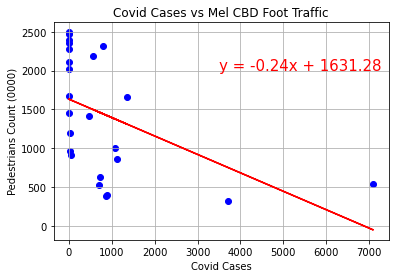

In [273]:
# liner regression
Covid_Cases_x  = summary_gr_df['Covid_Cases'].sum()
Ped_Count_y = summary_gr_df['Ped_Count_0000'].sum()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Covid_Cases_x, Ped_Count_y)

Covid_Cases_df = pd.DataFrame(Covid_Cases_x)

# calculate linear regression
regress_values = Covid_Cases_df * slope + intercept

# linear regression line and equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatter plot with liner regression line and equation
plt.xlabel('Covid Cases')
plt.ylabel('Pedestrians Count (0000)')
plt.title('Covid Cases vs Mel CBD Foot Traffic')
#plt.ylim(34,46)
#plt.xlim(14,26)

plt.scatter(Covid_Cases_x, Ped_Count_y, marker='o', facecolors='blue' )
plt.plot(Covid_Cases_x,regress_values,"r-")
plt.annotate(line_eq,(3500,2000),fontsize=15,color="red")
plt.grid()

# save an image of the scatter plot and print it to the screen
plt.savefig('Images/Covid_Cases_vs_Ped_Count_linear_pyplot.png')
plt.show()